In [ ]:
###MARKDOWN



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Setup url and query_url for api pulls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total_no_cities = len(cities)
total_no_cities

588

In [ ]:
# Perform a weather check on each city using a series of successive API calls.
# for city in cities:
#     response = requests.get(query_url + city).json()

# print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
city_id = []
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

city_number = 0
# Perform a weather check on each city using a series of successive API calls.
for city in cities:
    response = requests.get(query_url + city).json()
    city_number += 1
    try:

        print(f"City {city_number} of {total_no_cities}: {(response['name'])}")
        city_id.append(response['id'])
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        
    except:
        print(f"City not found. Skipping...")
        pass
  
#     if city_number == 35:
#         break
# Include a print log of each city as it's being processed (with the city number and city name).


City 1 of 588: Fortuna
City 2 of 588: La Santisima Trinidad
City 3 of 588: Forsytheganj
City 4 of 588: Nikel
City 5 of 588: Butaritari
City not found. Skipping...
City 7 of 588: Port Alfred
City 8 of 588: Nishihara
City 9 of 588: Thompson
City 10 of 588: Bud
City 11 of 588: Rafai
City 12 of 588: Hearst
City not found. Skipping...
City 14 of 588: Waitati
City 15 of 588: Faanui
City 16 of 588: Offa
City 17 of 588: Haines Junction
City 18 of 588: Vanimo
City 19 of 588: Arrondissement du Havre
City 20 of 588: Mataura
City 21 of 588: Luganville
City 22 of 588: Souillac
City 23 of 588: Isangel
City 24 of 588: Atuona
City 25 of 588: Saskylakh
City 26 of 588: East London
City 27 of 588: Rocha
City 28 of 588: Rikitea
City 29 of 588: Busselton
City 30 of 588: Port Elizabeth
City 31 of 588: Nikolayevka
City 32 of 588: Albany
City 33 of 588: Hasaki
City not found. Skipping...
City 35 of 588: Balikpapan
City 36 of 588: Hermanus
City not found. Skipping...
City 38 of 588: Tasiilaq
City 39 of 588: Ba

City 311 of 588: Sitka
City 312 of 588: Turaif
City 313 of 588: Malé
City not found. Skipping...
City 315 of 588: Ilulissat
City 316 of 588: Sampit
City 317 of 588: Alofi
City 318 of 588: Nambour
City 319 of 588: Okha
City 320 of 588: Tougan
City 321 of 588: Tilichiki
City 322 of 588: Maningrida
City 323 of 588: Paragominas
City 324 of 588: Provideniya
City 325 of 588: Esso
City 326 of 588: Pierre
City 327 of 588: Le Vauclin
City not found. Skipping...
City 329 of 588: Longonjo
City 330 of 588: Broome
City not found. Skipping...
City 332 of 588: Port Lincoln
City 333 of 588: Yulara
City 334 of 588: Solnechnyy
City 335 of 588: Samdari
City 336 of 588: Livingston
City not found. Skipping...
City 338 of 588: Guaíra
City 339 of 588: Hazleton
City 340 of 588: Banda Aceh
City 341 of 588: Northam
City 342 of 588: Labuan
City 343 of 588: Gobabis
City 344 of 588: Burē
City 345 of 588: Ancud
City 346 of 588: Tenosique
City 347 of 588: Dosso
City 348 of 588: Flin Flon
City 349 of 588: Salinópolis

In [5]:
# Display the DataFrame
weather_df = pd.DataFrame({'City_ID': city_id, 'City': city_name, 'Cloudiness': cloudiness,
                'Country': country, 'Date': date, 'Humidity': humidity, 'Lat': lat, 'Lon': lng,
                'Max Temp': max_temp, 'Wind Speed': wind_speed})

# weather_df.dropna()
weather_df.to_csv(output_data_file, index=False)
weather_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,5563839,Fortuna,3,US,1596157068,73,40.60,-124.16,20.00,1.79
1,3902377,La Santisima Trinidad,0,BO,1596156798,40,-14.83,-64.90,18.57,1.17
2,10722858,Forsytheganj,20,BY,1596157069,93,52.63,29.73,11.70,3.10
3,522260,Nikel,97,RU,1596157069,93,69.41,30.22,11.00,4.10
4,2110227,Butaritari,100,KI,1596157069,72,3.07,172.79,28.19,3.02


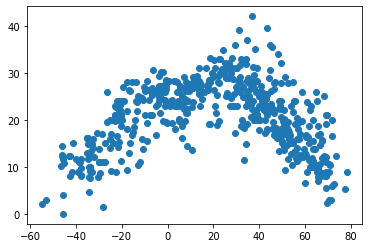

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"])

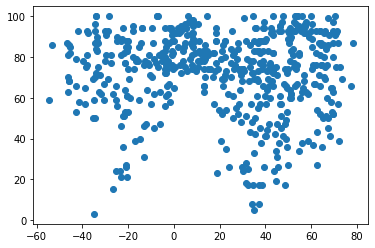

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"])

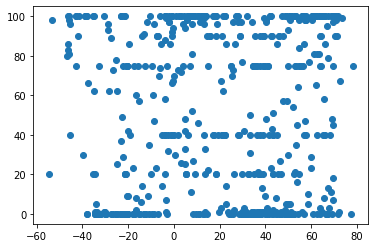

In [11]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"])

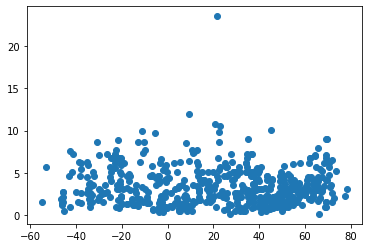

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"])

In [ ]:
# Northern Hemisphere - Temperature (F) vs. Latitude
# Southern Hemisphere - Temperature (F) vs. Latitude
# Northern Hemisphere - Humidity (%) vs. Latitude
# Southern Hemisphere - Humidity (%) vs. Latitude
# Northern Hemisphere - Cloudiness (%) vs. Latitude
# Southern Hemisphere - Cloudiness (%) vs. Latitude
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
# Southern Hemisphere - Wind Speed (mph) vs. Latitude